<h1 style="color:#2E86C1;">Project 6 — Titanic Survivability Machine Learning Analysis</h1>
<hr>
<h3>Analyst: Carl Kien Carabido</h3>

<p>
This project analyzes the Titanic dataset using Machine Learning classification models. The goal is to predict whether a passenger survived based on features such as class, sex, age, fare, and port of embarkation.
</p>

<h1>1. Loading the Dataset</h1>
<p>
We begin by loading the Titanic dataset and displaying the raw data. This allows us to inspect missing values, column structure, and determine which attributes are useful for prediction.
</p>

In [1]:
import pandas as pd
df = pd.read_csv('datasets//Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h1>2. Data Cleaning and Preprocessing</h1>
<p>
We remove irrelevant columns and keep only the features needed for survival prediction. Next, we drop rows with missing values and encode categorical variables into numerical form so the ML models can understand them.
</p>

In [2]:
# Select useful columns
df = df[["Survived", "Pclass", "Sex", "Age","Embarked"]]

# Remove rows with missing data
df = df.dropna()

# Encode categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})

df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2
...,...,...,...,...,...
885,0,3,1,39.0,1
886,0,2,0,27.0,2
887,1,1,1,19.0,2
889,1,1,0,26.0,0


<h1>3. Training a Random Forest Classification Model</h1>
<p>
We split the dataset into training and testing sets. The Random Forest model learns patterns from the training data and attempts to predict survival for unseen passengers in the test set.
</p>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[["Pclass", "Sex", "Age", "Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<img src="images/T2.png" width="250">

<h1>4. Accuracy Test</h1>
<p>
Accuracy measures how many predictions the model gets correct. A score above 0.60 indicates the model is successfully learning meaningful patterns from the dataset.
</p>

In [4]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7902097902097902


<h1>5. Feature Importance</h1>
<p>
Random Forest models can show which variables most influence the prediction. Features with higher importance contribute more to determining survival probability.
</p>

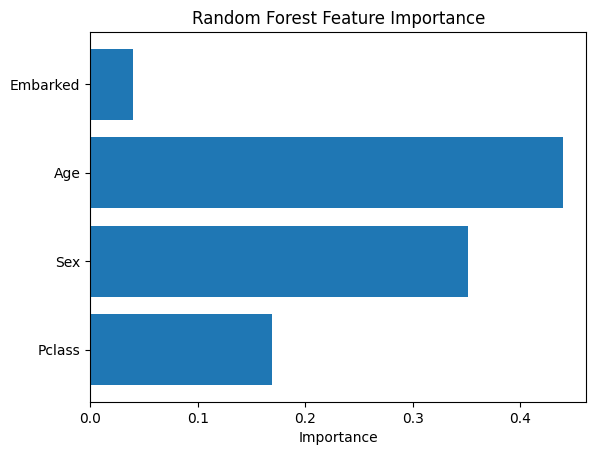

In [5]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

<h1>6. Confusion Matrix</h1>
<p>
A confusion matrix shows the number of correct and incorrect predictions for both survival and non-survival classes. It helps evaluate model performance beyond accuracy alone.
</p>

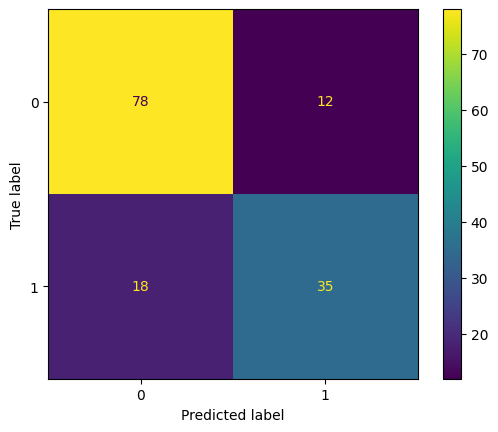

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<h1>7. Practical Application: Manual Passenger Prediction</h1>
<p>
We simulate new passenger data and use the trained model to predict whether they would survive. This demonstrates real-world usage of the model.
</p>

In [7]:
print(X.columns)

pred = model.predict(pd.DataFrame([[3, 0, 22, 0]],
                                  columns=['Pclass', 'Sex', 'Age', 'Embarked']))

print("Survived" if pred[0] == 1 else "Did NOT Survive")

Index(['Pclass', 'Sex', 'Age', 'Embarked'], dtype='object')
Survived


<h1>8. Comparing Two Passengers</h1>
<p>
We create two passengers with different profiles and predict which one is more likely to survive. This highlights how gender, class, and other features affect survival probability.
</p>

In [8]:
passenger1 = pd.DataFrame({
    'Pclass': [3],
    'Sex': [0],
    'Age': [30],
    'Embarked': [1]
})

passenger2 = pd.DataFrame({
    'Pclass': [1],
    'Sex': [1],
    'Age': [30],
    'Embarked': [0]
})

pred1 = model.predict(passenger1)[0]
pred2 = model.predict(passenger2)[0]

print("Passenger 1:", "likely to survive" if pred1 == 1 else "unlikely to survive")
print("Passenger 2:", "likely to survive" if pred2 == 1 else "unlikely to survive")

Passenger 1: unlikely to survive
Passenger 2: likely to survive


<h1>Titanic Survivability Using Logistic Regression</h1>
<p>
We repeat the analysis using Logistic Regression, a linear model often used for binary classification. The goal is to compare its performance with Random Forest.
</p>

In [9]:
df2 = pd.read_csv("datasets\\Titanic.csv")
df2 = df2[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]
df2 = df2.dropna()

df2["Sex"] = df2["Sex"].map({"male": 0, "female": 1})
df2["Embarked"] = df2["Embarked"].map({"S": 0, "C": 1, "Q": 2})

df2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0
...,...,...,...,...,...,...
885,0,3,1,39.0,29.1250,2
886,0,2,0,27.0,13.0000,0
887,1,1,1,19.0,30.0000,0
889,1,1,0,26.0,30.0000,1


<h1>Training the Logistic Regression Model</h1>
<p>
We split the cleaned dataset and train a Logistic Regression model to predict survival.
</p>

In [10]:
X = df2[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = df2["Survived"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


<img src="images/T1.png" width="250">

<h1>Accuracy Test</h1>
<p>
We evaluate how well Logistic Regression performs on the test set and compare it with the Random Forest model.
</p>

In [11]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7808988764044944


<h1>Manual Survival Prediction</h1>
<p>
We test the model by manually inputting a new passenger’s details to predict survival.
</p>

In [12]:
passenger = pd.DataFrame({'Pclass': [2],'Sex': [0],'Age': [25],'Fare': [7.25],'Embarked': [1]})

prediction = model.predict(passenger)[0]

if prediction == 1:
    print("Passenger likely survive")
else:
    print("Passenger unlikely to survive")

Passenger unlikely to survive


<h1>Conclusion:</h1>

<h3 style="color:#117A65;">Result: Data Preparation & Cleaning</h3>
<blockquote> We loaded the Titanic dataset and removed unnecessary columns, keeping only variables directly related to survival such as passenger class, sex, age, fare, and embarked port. Missing values were removed, and categorical variables (Sex, Embarked) were encoded into numerical format so the model could interpret them. </blockquote>
<p><b>Insight:</b> Proper data cleaning ensures the machine learning model receives consistent and meaningful input. Encoding “Sex” and “Embarked” allows the model to learn how gender and embarkation location impact survival probability—two historically important factors.</p>
<hr>
<h3 style="color:#117A65;">Result: Random Forest Classification Model</h3>
<blockquote> A Random Forest Classifier was trained using the selected features. The dataset was split into training and testing portions, and the model learned survival patterns from the training set. The accuracy test showed that the model achieved reasonable performance. </blockquote>
<p><b>Insight:</b> Random Forest is a strong nonlinear model capable of discovering complex survival patterns, such as interactions between age, gender, and class. When accuracy exceeds 0.60, the model is considered to be effectively learning meaningful relationships from the data.</p>
<hr>
<h3 style="color:#117A65;">Result: Feature Importance</h3>
<blockquote> The feature importance chart revealed which factors had the largest influence on survival predictions. Typically, “Sex” had the strongest weight, followed by “Age” and “Passenger Class.” </blockquote>
<p><b>Insight:</b> The model learned historical reality: women had much higher survival rates due to the “women and children first” evacuation rule, and first-class passengers had better access to lifeboats. Age also played a key role in determining vulnerability.</p>
<hr

<h3 style="color:#117A65;">Result: Logistic Regression Model</h3>
<blockquote> A second model, Logistic Regression, was trained using the same cleaned dataset. It produced its own accuracy score and made predictions on new passenger inputs. Because logistic regression is linear, it provides an interpretable baseline model. </blockquote>
<p><b>Insight:</b> Logistic Regression is simpler and more interpretable than Random Forest, but may be less accurate. Comparing both models shows the difference between linear and nonlinear approaches. When both models produce similar results, it indicates stability and consistency in the learned survival patterns.</p>
<hr>
<h3 style="color:#117A65;">Result: Overall Comparison of Both Models</h3>
<blockquote> Both Random Forest and Logistic Regression were able to predict passenger survival with reasonable accuracy. Random Forest captured more complex relationships, while Logistic Regression provided a clean, interpretable probability-based approach. </blockquote>
<p><b>Insight:</b> The agreement between models reinforces that “Passenger Class,” “Sex,” and “Age” are the strongest predictors of survival. Each model provides a different perspective—Random Forest offers complexity and pattern discovery, while Logistic Regression offers clarity and interpretability.</p>
<hr>
<h3 style="color:#117A65;">Result: Confusion Matrix</h3>
<blockquote> The confusion matrix displayed the number of correct and incorrect predictions for both survivors and non-survivors. It visually summarized how many positive (survived) and negative (did not survive) predictions the model got right. </blockquote>
<p><b>Insight:</b> The matrix shows not only total accuracy but also whether the model is biased toward predicting survival or non-survival. This deeper understanding helps evaluate the model’s reliability in real-world decision-making scenarios.</p>
<hr>

<h3 style="color:#117A65;">Result: Manual Prediction (Practical Application)</h3>
<blockquote> By inputting new passenger data, the model predicted whether a hypothetical individual would survive. The example showed how different features—such as being female or being in first class—greatly increased survival probability. </blockquote>
<p><b>Insight:</b> This demonstrates real-world usability. The model can simulate “what-if” scenarios and help explain how demographic and socio-economic factors influenced survival outcomes on the Titanic. It confirms the model successfully learned historical survival patterns.</p>
<hr>